In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
Use the retry module or similar alternatives.


In [3]:
sess=tf.Session()

In [4]:
mnist=input_data.read_data_sets('MNIST_data',one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
tf.set_random_seed(1)

In [6]:
lr=0.001
training_iters=100000
batch_size=128

In [7]:
n_inputs=28
n_steps=28
n_hidden_units=128
n_classes=10

In [8]:
x=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y=tf.placeholder(tf.float32,[None,n_classes])

In [9]:
weights={
    'in':tf.Variable(tf.random_normal([n_inputs,n_hidden_units])),
    'out':tf.Variable(tf.random_normal([n_hidden_units,n_classes]))
}

In [10]:
biases={
    'in':tf.Variable(tf.constant(0.1,shape=[n_hidden_units,])),
    'out':tf.Variable(tf.constant(0.1,shape=[n_classes,]))
}

In [11]:
def RNN(X,weights,biases):
    X_2=tf.reshape(X,[-1,n_inputs])
    X_in=tf.matmul(X_2,weights['in'])+biases['in']
    X_in_2=tf.reshape(X_in,[-1,n_steps,n_hidden_units])
    cell=tf.contrib.rnn.BasicLSTMCell(n_hidden_units)
    init_state=cell.zero_state(batch_size,dtype=tf.float32)
    outputs,final_state=tf.nn.dynamic_rnn(cell,X_in_2,initial_state=init_state,
                                          time_major=False)
    outputs_2=tf.unstack(tf.transpose(outputs,[1,0,2]))
    results=tf.matmul(outputs_2[-1],weights['out'])+biases['out']
    return results

In [12]:
batch_xs,batch_ys=mnist.train.next_batch(batch_size)

In [15]:
len(batch_xs)

128

In [16]:
batch_xs.shape

(128, 784)

In [17]:
batch_ys.shape

(128, 10)

In [18]:
batch_xs_2=batch_xs.reshape(batch_size,n_steps,n_inputs)

In [19]:
batch_xs_2.shape

(128, 28, 28)

In [22]:
X=tf.reshape(batch_xs_2,[-1,n_inputs])

In [23]:
X.shape

TensorShape([Dimension(3584), Dimension(28)])

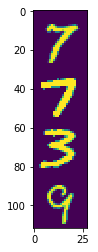

In [27]:
plt.imshow(sess.run(X)[0:4*28,:])

In [28]:
X_in=tf.matmul(X,weights['in'])+biases['in']

In [29]:
X_in.shape

TensorShape([Dimension(3584), Dimension(128)])

In [30]:
X_in_2=tf.reshape(X_in,[-1,n_steps,n_hidden_units])

In [31]:
X_in_2.shape

TensorShape([Dimension(128), Dimension(28), Dimension(128)])

In [36]:
cell=tf.contrib.rnn.BasicLSTMCell(n_hidden_units)

In [40]:
init_state=cell.zero_state(batch_size,dtype=tf.float32)
init_state

LSTMStateTuple(c=<tf.Tensor 'BasicLSTMCellZeroState_1/zeros:0' shape=(128, 128) dtype=float32>, h=<tf.Tensor 'BasicLSTMCellZeroState_1/zeros_1:0' shape=(128, 128) dtype=float32>)

In [38]:
outputs,final_state=tf.nn.dynamic_rnn(cell,X_in_2,initial_state=init_state,
                                      time_major=False)

In [39]:
outputs.shape

TensorShape([Dimension(128), Dimension(28), Dimension(128)])

In [41]:
final_state

LSTMStateTuple(c=<tf.Tensor 'rnn/while/Exit_3:0' shape=(128, 128) dtype=float32>, h=<tf.Tensor 'rnn/while/Exit_4:0' shape=(128, 128) dtype=float32>)

In [42]:
outputs_2=tf.matmul(outputs[-1],weights['out'])+biases['out']

In [43]:
outputs_2.shape

TensorShape([Dimension(28), Dimension(10)])

In [13]:
pred=RNN(x,weights,biases)

In [14]:
cost=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=pred,labels=y))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



In [15]:
train_op=tf.train.AdamOptimizer(lr).minimize(cost)

In [18]:
correct_pred=tf.equal(tf.argmax(pred,1),tf.argmax(y,1))

In [19]:
accuracy=tf.reduce_mean(tf.cast(correct_pred,tf.float32))

In [36]:
sess.run(tf.initialize_all_variables())

Instructions for updating:
Use `tf.global_variables_initializer` instead.


In [37]:
step=0

In [39]:
while step*batch_size<training_iters:
    batch_xs,batch_ys=mnist.train.next_batch(batch_size)
    batch_xs_2=batch_xs.reshape([batch_size,n_steps,n_inputs])
    sess.run([train_op],feed_dict={
        x:batch_xs_2,
        y:batch_ys,
    })
    if step%20==0:
        print(sess.run(accuracy,feed_dict={
            x:batch_xs_2,
            y:batch_ys,
        }))
    step+=1

0.28125
0.7109375
0.7734375
0.7734375
0.78125
0.84375
0.8203125
0.890625
0.8515625
0.9140625
0.9375
0.9375
0.8828125
0.9296875
0.9921875
0.9609375
0.8984375
0.9296875
0.921875
0.9453125
0.9296875
0.9765625
0.9453125
0.96875
0.9453125
1.0
0.953125
0.9765625
0.9296875
0.953125
0.9765625
1.0
0.953125
0.9921875
0.96875
0.9375
0.96875
0.96875
0.9765625
0.984375


In [3]:
#################下面开始再手打一遍，加强理解

In [4]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

Instructions for updating:
Use the retry module or similar alternatives.


In [5]:
mnist=input_data.read_data_sets('MNIST_DATA',one_hot='True')

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_DATA\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_DATA\t10k-images-idx3-ubyte.gz
Extracting MNIST_DATA\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
tf.set_random_seed(1)

In [7]:
lr=0.001
training_iters=100000
batch_size=128
n_inputs=28
n_steps=28
n_hidden_units=128
n_classes=10

In [8]:
x=tf.placeholder(tf.float32,[None,n_steps,n_inputs])
y=tf.placeholder(tf.float32,[None,n_classes])

In [10]:
weights={'in':tf.Variable(tf.random_normal([n_inputs,n_hidden_units])),
        'out':tf.Variable(tf.random_normal([n_hidden_units,n_classes]))}
biases={'in':tf.Variable(tf.constant(0.1,shape=[n_hidden_units,])),
       'out':tf.Variable(tf.constant(0.1,shape=[n_classes]))}

In [12]:
def RNN(X,weights,biases):
    X=tf.reshape(X,[-1,n_inputs])
    X_in=tf.matmul(X,weights['in'])+biases['in']
    X_in=tf.reshape(X_in,[-1,n_steps,n_hidden_units])
    cell=tf.contrib.rnn.BasicLSTMCell(n_hidden_units)
    init_state=cell.zero_state(batch_size,dtype=tf.float32)
    outputs,dinal_state=tf.nn.dynamic_rnn(cell,X_in,initial_state=init_state,time_major=False)
    outputs=tf.unstack(tf.transpose(outputs,[1,0,2]))
    results=tf.matmul(outputs[-1],weights['out'])+biases['out']
    return results